In [2]:
import sqlite3

# Connect to the SQLite database 
connection = sqlite3.connect('sales_data.db')
cursor = connection.cursor()

# Create a table for sales data
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product_name TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL) ''')

# Insert sample data into the sales table
sample_data = [
    ("Apples", 10, 20.0),
    ("Bananas", 5, 15.0),
    ("Oranges", 8, 18.0),
    ("Pineapple", 15, 20.0),
    ("Peach", 10, 15.0),
    ("Cherry", 12, 18.0),
    ("Strawberry", 20, 20.0)
]

cursor.executemany("INSERT INTO sales (product_name, quantity, price) VALUES (?, ?, ?)", sample_data)

connection.commit()

connection.close()

print("✅ Database created and populated.")


✅ Database created and populated.


📊 Sales Summary:
  product_name  total_qty  revenue
0       Apples        150   3000.0
1      Bananas         60    900.0
2       Cherry         72   1296.0
3      Oranges         88   1584.0
4        Peach         60    900.0
5    Pineapple         90   1800.0
6   Strawberry        120   2400.0


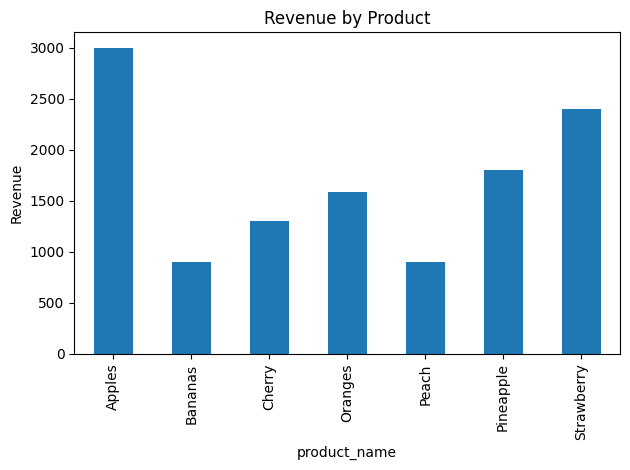

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("sales_data.db")

query = """
SELECT 
    product_name, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product_name
"""

df = pd.read_sql_query(query, conn)
conn.close()

print("📊 Sales Summary:")
print(df)

df.plot(kind='bar', x='product_name', y='revenue', title='Revenue by Product', legend=False)
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()